In [14]:
import mdtraj as md
import numpy as np
import os
from Bio import pairwise2


protein='Mad2'
#select folder created by parse_AF_output script
folder='results'
pdb_GS='closed'
pdb_FS='open'

In [2]:
fullMSA=md.load(folder+'/fullMSA_noH.pdb')
GS=md.load(pdb_GS+'.pdb')
FS=md.load(pdb_FS+'.pdb')



clusters = []

# Sort filenames numerically based on the number after 'clus'
def extract_cluster_number(filename):
    # Extract the number part from 'clusX.pdb'
    return int(filename[4:-4])

# Get the sorted list of filenames
sorted_filenames = sorted(
    [f for f in os.listdir(folder) if f.startswith('clus') and f.endswith('.pdb')],
    key=extract_cluster_number
)

for filename in sorted_filenames:
    cluster = md.load(os.path.join(folder, filename))
    clusters.append(cluster)

trajectory = clusters[0]
for cluster in clusters[1:]:
    trajectory += cluster

GS=md.load(pdb_GS+'.pdb')
FS=md.load(pdb_FS+'.pdb')

#load plDDT and cluster size values from the file written by get-pldtt-cluster_size.sh
plddt = np.load(folder+'/plddt.npy')
cl_size = np.load(folder+'/size.npy')

In [3]:
backbone_GS=[]
backbone_FS=[]
backbone_ref=[]
app=[]



# Dictionary to map three-letter codes to one-letter codes
three_to_one = {
    "ALA": "A", "ARG": "R", "ASN": "N", "ASP": "D", "CYS": "C",
    "GLU": "E", "GLN": "Q", "GLY": "G", "HIS": "H", "ILE": "I",
    "LEU": "L", "LYS": "K", "MET": "M", "PHE": "F", "PRO": "P",
    "SER": "S", "THR": "T", "TRP": "W", "TYR": "Y", "VAL": "V"
}


with open(folder+'/fullMSA_noH.pdb', 'r') as file:
    for index, line in enumerate(file):
        columns = line.strip().split()
        if len(columns) >= 4 and (columns[2] == "C"):
            backbone_ref.append(index+1)
            app.append(columns[3])
res_ref= "".join([three_to_one[aa] for aa in app])
app=[]
  

with open(pdb_GS+'.pdb', 'r') as file:
    for index, line in enumerate(file):
        columns = line.strip().split()
        if len(columns) >= 4 and (columns[2] == "C"):
            backbone_GS.append(index+1)
            app.append(columns[3])
            
res_GS= "".join([three_to_one[aa] for aa in app])
app=[]      

with open(pdb_FS+'.pdb', 'r') as file:
    for index, line in enumerate(file):
        columns = line.strip().split()
        if len(columns) >= 4 and (columns[2] == "C"):
            backbone_FS.append(index+1)
            app.append(columns[3])
            
res_FS= "".join([three_to_one[aa] for aa in app])      






In [4]:
alignments = pairwise2.align.globalxx(res_ref, res_GS)
ind_GS = [index for index, char in enumerate(alignments[0][1]) if char != '-']


In [5]:
alignments[0][0]

'GMALQLSREQGITLRGSAEIVAEFFSFGINSILYQRGIYPSETFTRVQKYGLTLLVTTDLELIKYLNNVVEQLKDWLYKCSVQKLVVVISNIESGEVLERWQFDIECDKTAKDDSAPREKSQKAIQDEIRSVIAQITATVTFLPLLEVSCSFDLLIYTDKDLVVPEKWEESGPQFITNSEEVRLRSFTTTIHKVNSMVAYKIPVND'

In [6]:
alignments[0][1]

'GMALQLSREQGITLRGSAEIVAEFFSFGINSILYQRGIYPSETFTRVQKYGLTLLVTTDLELIKYLNNVVEQLKDWLYKCSVQKLVVVISNIESGEVLERWQFDIECDKTAKDDSAPREKSQKAIQDEIRSVIAQITATVTFLPLLEVSCSFDLLIYTDKDLVVPEKWEESGPQFITNSEEVRLRSFTTTIHKVNSMVAYKIPVND'

In [7]:
ind_GS

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [8]:
alignments = pairwise2.align.globalxx(res_ref, res_FS)
ind_FS = [index for index, char in enumerate(alignments[0][1]) if char != '-']

In [9]:
alignments[0][0]

'GMALQLSREQGITLRGSAEIVAEFFSFGINSILYQRGIYPSETFTRVQKYGLTLLVTTDLELIKYLNNVVEQLKDWLYKCSVQKLVVVISNIESGEVLERWQFDIECDKTAKDDSAPREKSQKAIQDEIRSVIAQITATVTFLPLLEVSCSFDLLIYTDKDLVVPEKWEESGPQFITNSEEVRLRSFTTTIHKVNSMVAYKIPVND'

In [10]:
alignments[0][1]

'GMALQLSREQGITLRGSAEIVAEFFSFGINSILYQRGIYPSETFTRVQKYGLTLLVTTDLELIKYLNNVVEQLKDWLYKCSVQKLVVVISNIESGEVLERWQFDIECDKTAKDDSAPREKSQKAIQDEIRSVIAQITATVTFLPLLEVSCSFDLLIYTDKDLVVPEKWEESGPQFITNSEEVRLRSFTTTIHKVNSMVAYKIPVND'

In [11]:
rmsd_full_GS = md.rmsd(fullMSA, GS, atom_indices=np.array(backbone_ref)[np.array(ind_GS)], ref_atom_indices=np.array(backbone_GS))
rmsd_full_FS=md.rmsd(fullMSA, FS, atom_indices=np.array(backbone_ref)[np.array(ind_FS)], ref_atom_indices=np.array(backbone_FS))

In [12]:
rmsd_GS = md.rmsd(trajectory, GS, atom_indices=np.array(backbone_ref)[np.array(ind_GS)], ref_atom_indices=np.array(backbone_GS))
rmsd_FS = md.rmsd(trajectory, FS, atom_indices=np.array(backbone_ref)[np.array(ind_FS)], ref_atom_indices=np.array(backbone_FS))


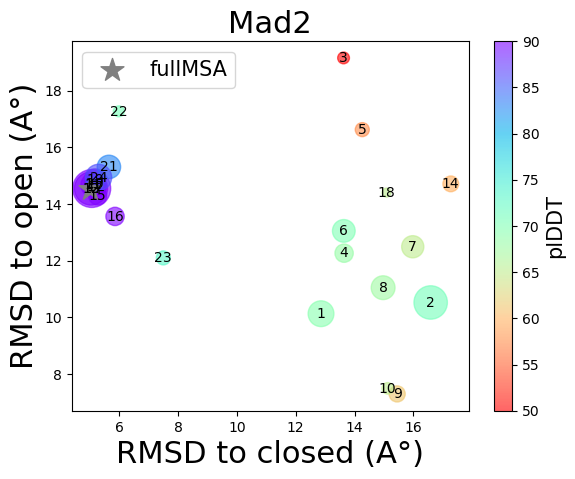

In [15]:
import matplotlib.pyplot as plt

plt.title(protein, fontsize=22)
sc = plt.scatter(rmsd_GS * 10, rmsd_FS * 10, c=plddt, cmap='rainbow_r', vmin=50, vmax=90, s=cl_size*3, alpha=0.6)
cbar = plt.colorbar(sc, label='plDDT')  # Create colorbar and set label

# Set font size for colorbar label
cbar.ax.yaxis.label.set_fontsize(15)

# Plotting a different marker for a specific point
plt.scatter(rmsd_full_GS * 10, rmsd_full_FS * 10, marker='*', s=300, label='fullMSA', color='grey')

for i, (x, y) in enumerate(zip(rmsd_GS * 10, rmsd_FS * 10)):
    plt.text(x, y, str(i+1), fontsize=10, ha='center', va='center', color='black')

# Adding dashed lines
#plt.axhline(y=4, color='black', linestyle='--')
#plt.axvline(x=4, color='black', linestyle='--')

# Setting limits and ticks for both axes
#plt.xlim([0, 23])
#plt.ylim([7, 22])
#plt.xticks([4,8,12,16], fontsize=22)
#plt.yticks([4,8,12,16], fontsize=22)

# Adding labels and legend
plt.xlabel('RMSD to '+pdb_GS+' (A°)', fontsize=22)
plt.ylabel('RMSD to '+pdb_FS+' (A°)', fontsize=22)
plt.legend(fontsize=15)

plt.show()

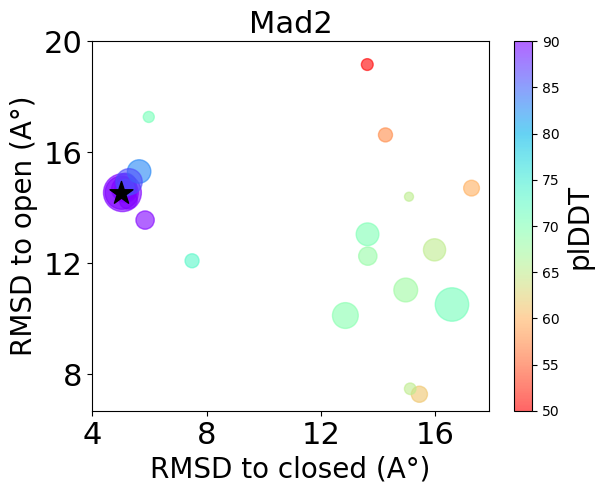

In [19]:
plt.title(protein, fontsize=22)
sc = plt.scatter(rmsd_GS * 10, rmsd_FS * 10, c=plddt, cmap='rainbow_r', vmin=50, vmax=90, s=cl_size*3, alpha=0.6)
cbar = plt.colorbar(sc, label='plDDT')  # Create colorbar and set label

# Set font size for colorbar label
cbar.ax.yaxis.label.set_fontsize(20)

# Plotting a different marker for a specific point
plt.scatter(rmsd_full_GS * 10, rmsd_full_FS * 10, marker='*', s=300, label='fullMSA', color='black')


# Adding dashed lines
#plt.axhline(y=4, color='black', linestyle='--')
#plt.axvline(x=4, color='black', linestyle='--')

# Setting limits and ticks for both axes
#plt.xlim([0, 23])
#plt.ylim([7, 22])
plt.xticks([4,8,12,16], fontsize=22)
plt.yticks([8,12,16,20], fontsize=22)

# Adding labels and legend
plt.xlabel('RMSD to '+pdb_GS+' (A°)', fontsize=20)
plt.ylabel('RMSD to '+pdb_FS+' (A°)', fontsize=20)
#plt.legend(fontsize=15)

plt.show()

In [20]:
np.where(rmsd_GS<0.8)[0]+1

array([11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 23, 24])

In [21]:
np.where(rmsd_GS>0.9)[0]+1

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 18])